In [58]:
# Importing my required libraries

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
# Uploading my cleaned and Analysed (EDA) file (RossmannSales.csv)

df=pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/RossmannSales.csv', index_col=0)

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [60]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Month,Day,Season,Week,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountPerWeek,CompetitionOpenSince,CompetitionDistanceLOG
0,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,31,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
1,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,30,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
2,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,29,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
3,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,28,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
4,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,27,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772


In [61]:
df.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Year                           int64
Month                          int64
Day                            int64
Season                         int64
Week                           int64
Holiday per week               int64
Avg CustomersPerMonth        float64
Avg CustomersPerWeek         float64
PromoCountPerWeek              int64
C

In [62]:
# Importing my already saved States locations from the location.csv file

location = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/location.csv')

In [63]:
df=df.merge(location,on=["Store"],how="inner")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Day,Season,Week,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountPerWeek,CompetitionOpenSince,CompetitionDistanceLOG,State
0,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,31,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772,HE
1,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,30,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772,HE
2,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,29,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772,HE
3,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,28,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772,HE
4,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,27,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772,HE


In [64]:
# Encoding State variables as per their geographical locations

i=0
for j in df["State"].unique():
   df["State"]=np.where(df["State"]==j,i,df["State"])
   i=i+1
df["State"]=df["State"].astype(int)

In [65]:
# Sorting my dataset on time (Date column) in order to split it between train and test

df = df.sort_values(by="Date")

In [66]:
df.shape

(1017209, 30)

In [67]:
# Doing the Train-Test Split

from sklearn.model_selection import train_test_split

X = df.drop(['Date','Sales','CompetitionOpenSince'], axis =1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(813767, 27) (813767,) (203442, 27) (203442,)


## Using Linear Regression to predict 'Sales'

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linear_reg_model=LinearRegression()

Linear_reg=linear_reg_model.fit(X_train,y_train)

In [70]:
# Doing the predictions from my model

LR_y_pred=linear_reg_model.predict(X_test)

LR_pred_df=pd.DataFrame({'Predictions':LR_y_pred,'Actual':y_test})

LR_pred_df=LR_pred_df.reset_index(drop=True)

LR_pred_df.head()

,Predictions,Actual
0,9132.517312,9815
1,992.541675,0
2,4294.689203,3680
3,10208.714188,11539
4,8300.693491,8092


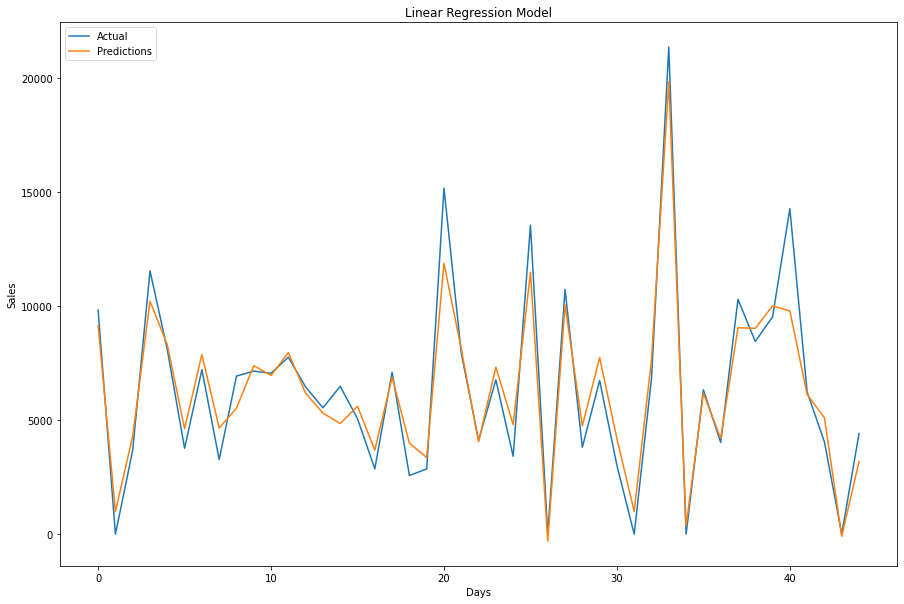

In [71]:
# Plotting the findings

plt.figure(figsize=(15,10))
LR_pred_df["Actual"][:45,].plot.line()
LR_pred_df["Predictions"][:45,].plot.line()
plt.title('Linear Regression Model')
plt.ylabel('Sales')
plt.xlabel('Days')
plt.legend(['Actual', 'Predictions'], loc='upper left')
plt.show()

In [72]:
linear_reg_model.score(X_test,y_test)

0.8742927731931849

## Using Lasso Regression to predict 'Sales'

In [73]:
from sklearn.linear_model import Lasso

Lasso_reg_model = Lasso(alpha=2)
Lasso_reg_model.fit(X_train,y_train)

Lasso(alpha=2)

In [74]:
# Doing the predictions from my model

Lasso_y_pred=Lasso_reg_model.predict(X_test)
Lasso_pred_df=pd.DataFrame({'Predictions':Lasso_y_pred,'Actual':y_test})
Lasso_pred_df=Lasso_pred_df.reset_index(drop=True)
Lasso_pred_df.head()

,Predictions,Actual
0,9123.857659,9815
1,1005.765762,0
2,4265.426491,3680
3,10200.667623,11539
4,8346.464508,8092


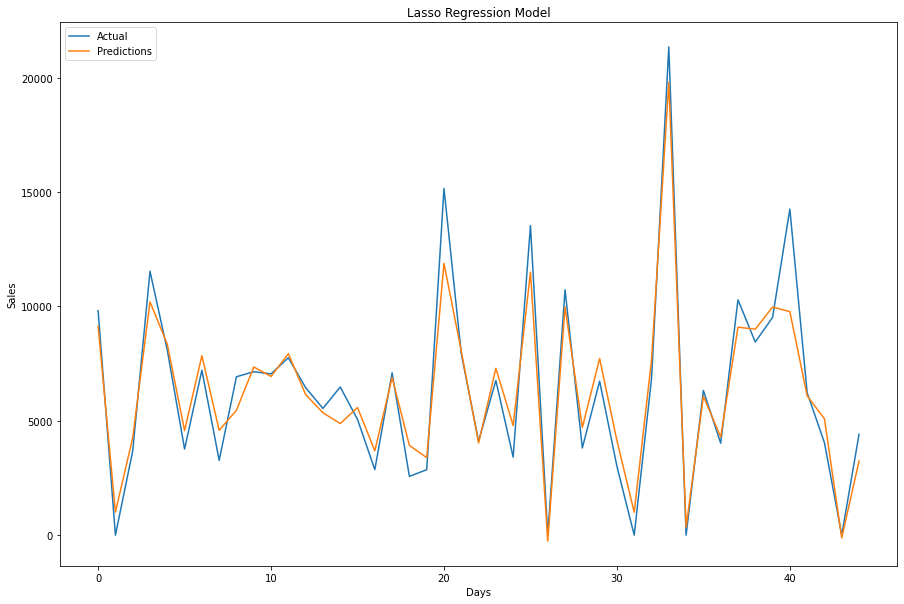

In [75]:
plt.figure(figsize=(15,10))
Lasso_pred_df["Actual"][:45,].plot.line()
Lasso_pred_df["Predictions"][:45,].plot.line()
plt.title('Lasso Regression Model')
plt.ylabel('Sales')
plt.xlabel('Days')
plt.legend(['Actual', 'Predictions'], loc='upper left')
plt.show()

In [76]:
Lasso_reg_model.score(X_test,y_test)

0.8741505351211134

## Using Decision Tree Regressor to predict 'Sales'

In [77]:
#Defining the rmspe metric

from sklearn.metrics import make_scorer

def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean(((y - yhat)/y)**2))
    return rmspe

def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    rmspe = np.sqrt(np.mean(((y - yhat)/y)**2))
    return "rmspe", rmspe

scorer = make_scorer(rmspe, greater_is_better=False)

In [78]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor(splitter='random', max_depth=16, random_state=21)
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, random_state=21, splitter='random')

In [79]:
# Doing the predictions from my model

train_preds = DTR_model.predict(X_train)
preds = DTR_model.predict(X_test)

print(f'Train score is {rmspe(y_train, train_preds)}.')
print(f'Test score is {rmspe(y_test, preds)}.')

Train score is 0.1319347122655476.
Test score is inf.


In [80]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, random_state=21, splitter='random')

In [81]:
DTR_y_pred = DTR_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':DTR_y_pred,'Actual':y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,8063.336153,9815
1,0.000000,0
2,4737.893023,3680
3,11424.864198,11539
4,7637.347418,8092


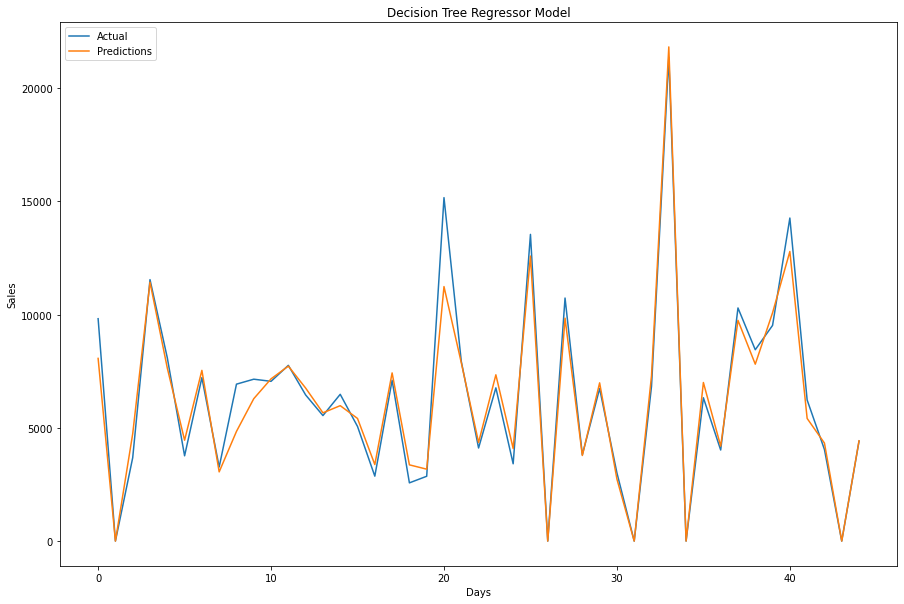

In [82]:
plt.figure(figsize=(15,10))
pred_df["Actual"][:45,].plot.line()
pred_df["Predictions"][:45,].plot.line()
plt.title('Decision Tree Regressor Model')
plt.ylabel('Sales')
plt.xlabel('Days')
plt.legend(['Actual', 'Predictions'], loc='upper left')
plt.show()

In [83]:
DTR_model.score(X_test,y_test)

0.9516518179882583

##Plotting all the 3 above models (LR,LR and DTR) on a single plot 

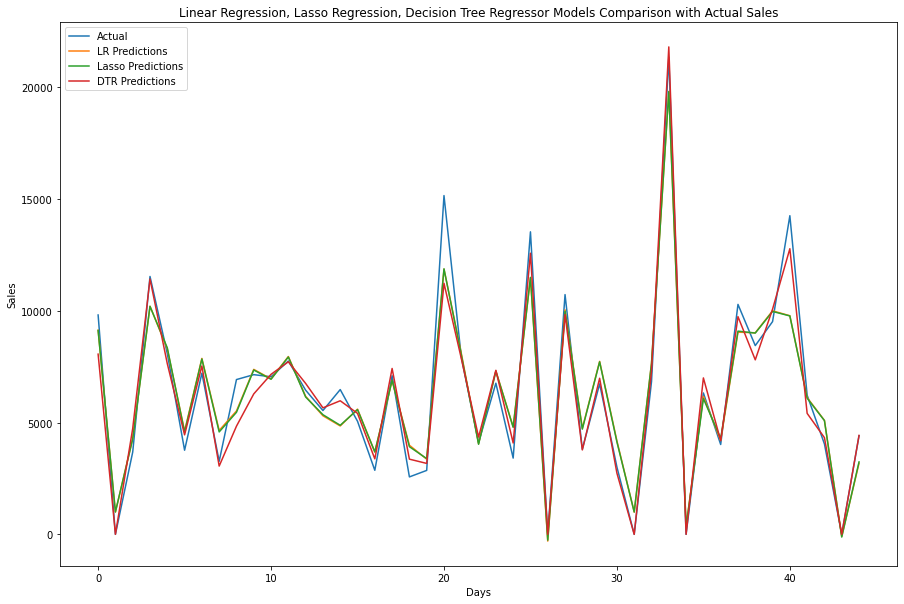

In [85]:
plt.figure(figsize=(15,10))
Lasso_pred_df["Actual"][:45,].plot.line()
LR_pred_df["Predictions"][:45,].plot.line()
Lasso_pred_df["Predictions"][:45,].plot.line()
pred_df["Predictions"][:45,].plot.line()
plt.title('Linear Regression, Lasso Regression, Decision Tree Regressor Models Comparison with Actual Sales')
plt.ylabel('Sales')
plt.xlabel('Days')
plt.legend(['Actual', 'LR Predictions','Lasso Predictions', 'DTR Predictions'], loc='upper left')
plt.show()

## Time Series Analysis

In [55]:
import random
time_features=df[["Year","Month","Day",	"Week",	"Season", "Promo", "Open","Store","Sales","Date"]]

#Choose a random store
x=random.randint(1,115)
print(x)
time_features=time_features.loc[time_features['Store'] == x]

82


<AxesSubplot:xlabel='Month', ylabel='Sales'>

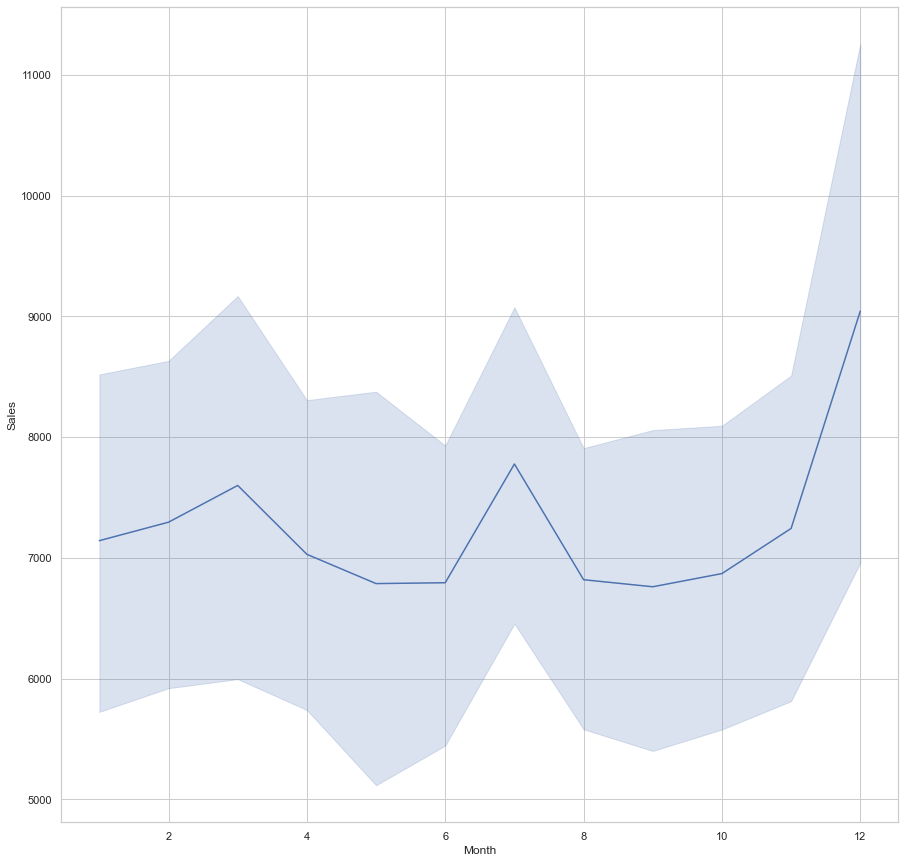

In [56]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2013])

<AxesSubplot:xlabel='Month', ylabel='Sales'>

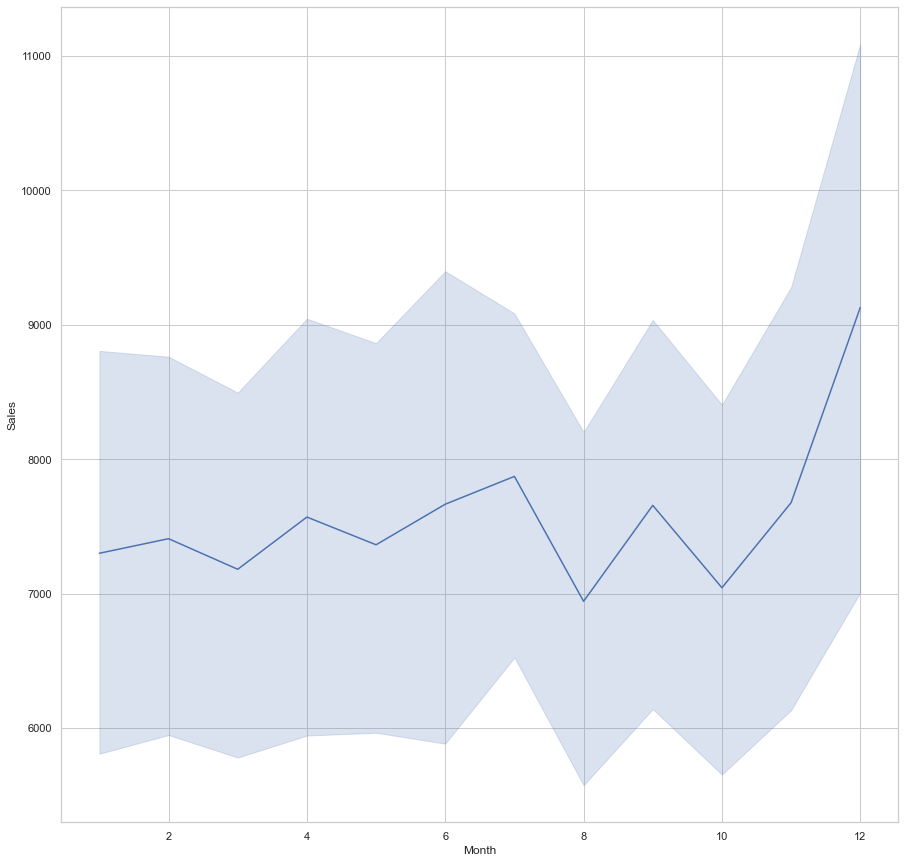

In [57]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2014])

<AxesSubplot:xlabel='Month', ylabel='Sales'>

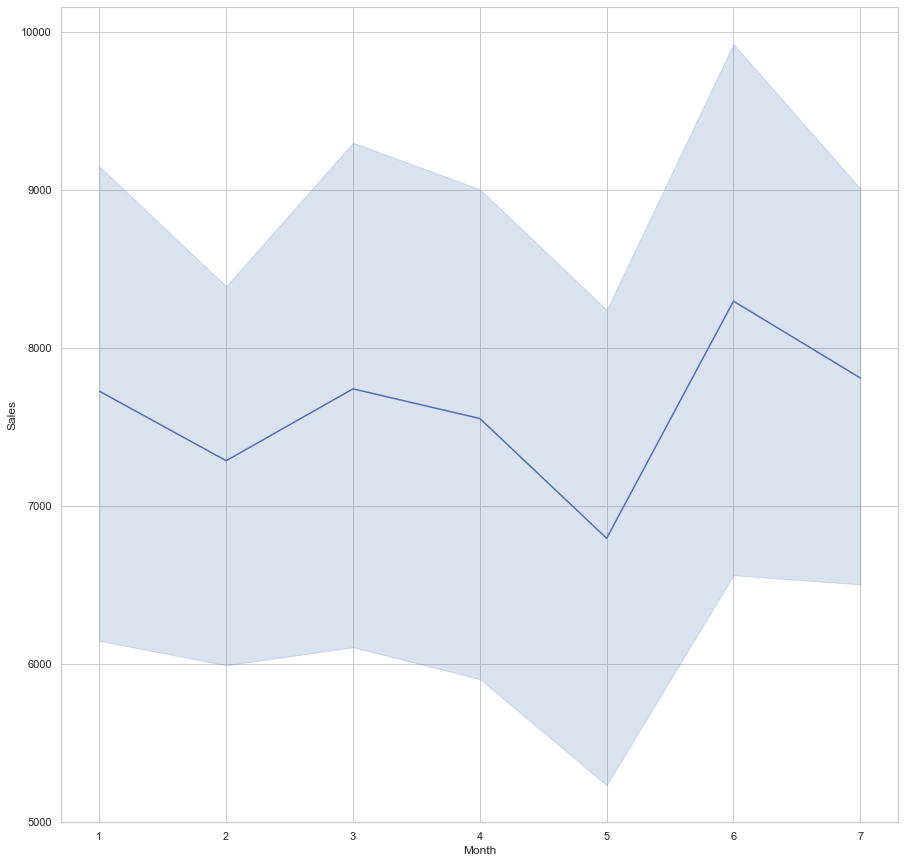

In [58]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2015])

In [32]:
# There is no clear cyclic trend for Sales vs. Time Series; thus, I will be applying a RNN (Recurrent 
# Neural Network) because there is a debatable point at this level

In [33]:
import tensorflow as tf
import keras
import keras.backend as kb

In [34]:
time_target=time_features["Sales"]
time_features=time_features.drop(columns=["Sales","Date"])

In [35]:
X_train=time_features[:int(time_features.shape[0]*80/100)]
y_train=time_target[:int(time_target.shape[0]*80/100)]

X_test=time_features[int(time_features.shape[0]*80/100):int(df.shape[0]*95/100)]
y_test=time_target[int(time_target.shape[0]*80/100):int(df.shape[0]*95/100)]

X_val=time_features[int(time_features.shape[0]*95/100):]
y_val=time_target[int(time_target.shape[0]*95/100):]

In [36]:
time_model=keras.models.Sequential()

time_model.add(keras.layers.Embedding(input_dim=2500, output_dim=4, input_length=8))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.Dense(64, activation="relu")) 
time_model.add(keras.layers.Dense(1))

In [37]:
time_model.compile(optimizer="adam",metrics=["mean_absolute_error"],loss="mean_squared_error")

In [38]:
hist=time_model.fit(X_train,y_train,batch_size=50,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
16/16 [==============================] - 4s 86ms/step - loss: 31279202.0000 - mean_absolute_error: 4983.2163 - val_loss: 36413164.0000 - val_mean_absolute_error: 5513.1914
Epoch 2/30
16/16 [==============================] - 1s 35ms/step - loss: 31099578.0000 - mean_absolute_error: 4971.1914 - val_loss: 36127376.0000 - val_mean_absolute_error: 5494.7671
Epoch 3/30
16/16 [==============================] - 1s 37ms/step - loss: 30825802.0000 - mean_absolute_error: 4952.6973 - val_loss: 35789348.0000 - val_mean_absolute_error: 5472.8540
Epoch 4/30
16/16 [==============================] - 1s 37ms/step - loss: 30486012.0000 - mean_absolute_error: 4930.0020 - val_loss: 35356048.0000 - val_mean_absolute_error: 5444.5767
Epoch 5/30
16/16 [==============================] - 1s 36ms/step - loss: 30053956.0000 - mean_absolute_error: 4900.2734 - val_loss: 34837912.0000 - val_mean_absolute_error: 5410.4756
Epoch 6/30
16/16 [==============================] - 1s 36ms/step - loss: 29548248.000

In [39]:
results=time_model.evaluate(X_test,y_test)

for i in range(len(time_model.metrics_names)):
    
  print(time_model.metrics_names[i],":",results[i])

6/6 [==============================] - 0s 9ms/step - loss: 9779709.0000 - mean_absolute_error: 2936.0776
loss : 9779709.0
mean_absolute_error : 2936.07763671875


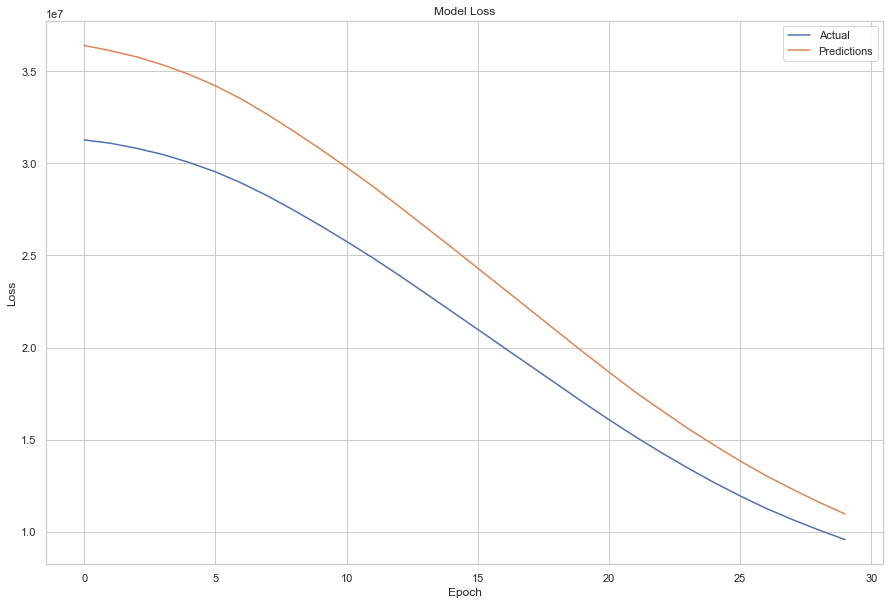

In [47]:
plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'][:30])
plt.plot(hist.history['val_loss'][:30])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Actual', 'Predictions'], loc='upper right')
plt.show()

**Models Comparison (Linear Regression, Lasso Regression, Decision Tree Regressor and Times Series Analysis)

## Prophet Regression Model

In [1]:
pip install pystan==2.19.1.1

     |████████████████████████████████| 37.4 MB 11.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

     |████████████████████████████████| 65 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 49 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 31.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/nadimsaad/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/4p/xxh5zljn71jd2nm_qmyc3x7h0000gn/T/pip-install-tied1zdw/prophet_e564226d4dbd4524b53336a13be4e1b3/setup.py'"'"'; __file__='"'"'/private/var/folders/4p/xxh5zljn71jd2nm_qmyc3x7h0000gn/T/pip-install-tied1zdw/prophet_e564226d4dbd4524b53336a13be4e1b3/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'

In [3]:
from prophet import Prophet

In [16]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Season', 'Week',
       'Holiday per week', 'Avg CustomersPerMonth', 'Avg CustomersPerWeek',
       'PromoCountPerWeek', 'CompetitionOpenSince', 'CompetitionDistanceLOG',
       'State'],
      dtype='object')

In [22]:
df_pr=df[['Date', 'Sales' ]]
df_pr

,Date,Sales
753151,2013-01-01,0
607767,2013-01-01,0
262937,2013-01-01,0
880593,2013-01-01,0
565302,2013-01-01,0
...,...,...
579218,2015-07-31,10764
331848,2015-07-31,8742
96908,2015-07-31,9194
30350,2015-07-31,11144


In [23]:
df_pr=df_pr.rename(columns={"Date": "ds", "Sales": "y"})
df_pr

,ds,y
753151,2013-01-01,0
607767,2013-01-01,0
262937,2013-01-01,0
880593,2013-01-01,0
565302,2013-01-01,0
...,...,...
579218,2015-07-31,10764
331848,2015-07-31,8742
96908,2015-07-31,9194
30350,2015-07-31,11144


In [29]:
m = Prophet(weekly_seasonality=True)
m.fit(df_pr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=45)
future.tail()

,ds
982,2015-09-10
983,2015-09-11
984,2015-09-12
985,2015-09-13
986,2015-09-14


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
982,2015-09-10,6383.901423,2637.086826,10203.773900
983,2015-09-11,6866.531182,3094.042829,10623.030160
984,2015-09-12,6005.788688,2313.814136,9788.171904
985,2015-09-13,370.518751,-3173.636755,4336.366576
986,2015-09-14,7978.348035,4200.677926,11927.578457


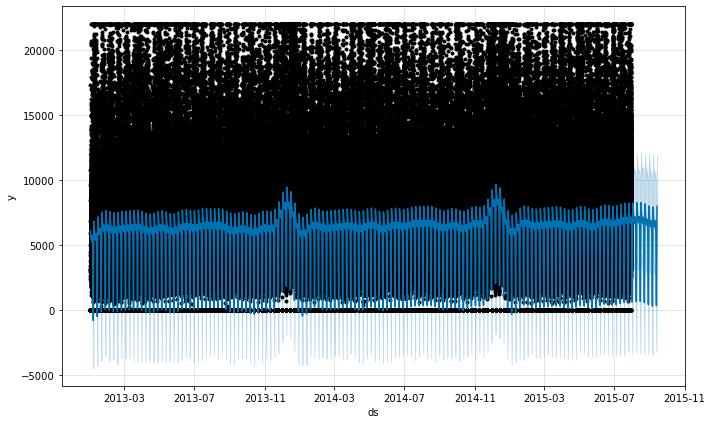

In [32]:
fig1 = m.plot(forecast)


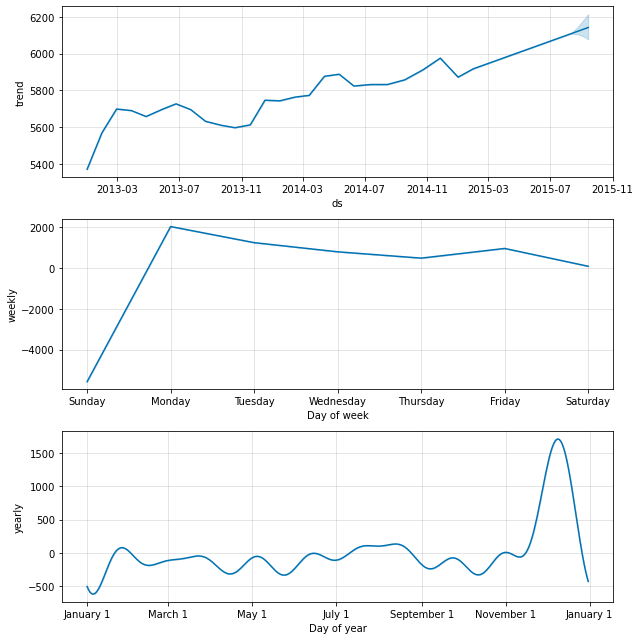

In [33]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.diagnostics import cross_validation

In [95]:
df_cv = cross_validation(m, initial='730 days', period='30 days', horizon = '30 days', parallel='processes')

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-07-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff1cb67e610>

KeyboardInterrupt



In [53]:
cutoffs = pd.to_datetime(['2014-07-01', '2015-01-01', '2015-07-01'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='25 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [54]:
df_cv2.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
79120,2015-07-26,909.844298,-2810.477624,4597.470515,0,2015-07-01
79121,2015-07-26,909.844298,-2937.226906,4950.057967,0,2015-07-01
79122,2015-07-26,909.844298,-2844.308911,4612.586401,0,2015-07-01
79123,2015-07-26,909.844298,-3069.112048,4747.658709,0,2015-07-01
79124,2015-07-26,909.844298,-2908.805880,4614.092964,0,2015-07-01


In [55]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days,9.746230e+06,3121.895307,2382.156933,0.319108,0.587139,0.868187
1,4 days,1.349443e+07,3673.476637,2679.528251,0.533699,0.879356,0.812321
2,5 days,1.562634e+07,3953.015989,2897.896543,0.753578,1.070386,0.763402
3,6 days,1.758346e+07,4193.263524,3245.220741,0.661657,0.920089,0.682275
4,7 days,1.734772e+07,4165.059941,3384.556228,0.649282,0.738014,0.653769


INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

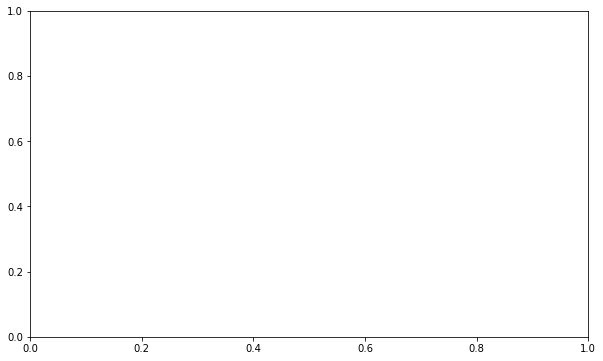

In [56]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='mape')

# Auto ARIMA Model (Dropped it after several Kernel crashes) 

In [11]:
from pmdarima.arima import auto_arima

In [12]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [13]:
df.set_index('Date', inplace=True)

In [14]:
# I will use the 'Augmented Dickey-Fuller Test' to check whether the data is stationary or not which is 
# available in the 'pmdarima' library

from pmdarima.arima import ADFTest

data_sales=df['Sales']

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_sales)

(0.01, False)

In [15]:
# Defining my X_train and X_test doing the train-test split

X_train, X_test=train_test_split(data_sales, shuffle=False)

In [ ]:
# Implementing the Auto Arima model

arima_model = auto_arima(X_train, start_p=0, d=1,start_q=0,
                        max_p=2, max_d=1, max_q=2, m=12,seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True, stepwise=True,
                        random_state=20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=15025817.140, Time=349.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=15030696.302, Time=16.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14811333.203, Time=179.93 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14521604.787, Time=574.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=15030694.302, Time=11.30 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14525933.352, Time=168.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=14517971.923, Time=1002.99 sec


In [97]:
prediction=pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['Predicted_Sales']
#prediction

In [96]:
arima_model.summary()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, lable='Training')
plt.plot(test,label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'left corner')
plt.show()